<a href="https://colab.research.google.com/github/AlinaStrav/AlinaStrav-Practical_Project_Machine_Learning/blob/main/Practical_Project_4_Alina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition


Detect if the mushroom is edible or poisonous.
The dataset used in this project is mushrooms.csv from kaggle

#Data Ingestion

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [ ]:
!wget https://raw.githubusercontent.com/AlinaStrav/Mus/main/mushrooms.csv

--2023-04-17 13:00:17--  https://raw.githubusercontent.com/AlinaStrav/Mus/main/mushrooms.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 374003 (365K) [text/plain]
Saving to: ‘mushrooms.csv’

mushrooms.csv       100%[===================>] 365.24K  --.-KB/s    in 0.01s   

2023-04-17 13:00:17 (28.2 MB/s) - ‘mushrooms.csv’ saved [374003/374003]



In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import graphviz

df = pd.read_csv("mushrooms.csv")

df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
print(pd.isnull(df).sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


#Data Preparation and Analysis

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
df['class'].unique()

array(['p', 'e'], dtype=object)

Mushroom Chek_Balance

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<Axes: title={'center': 'Balance Checking for input class in Mushrooms Dataset'}, xlabel='class', ylabel='count'>

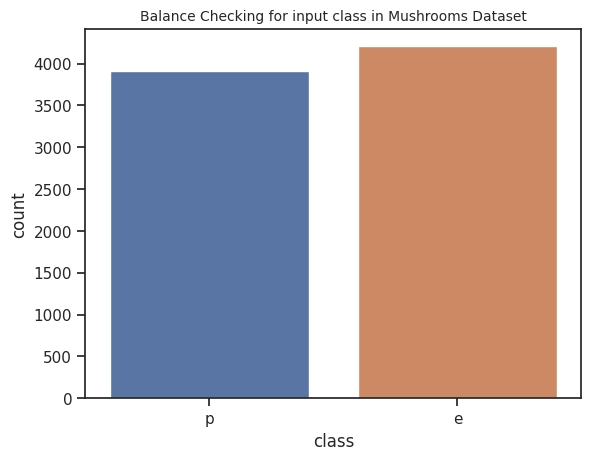

In [ ]:
sns.set(style='ticks', color_codes=True)
plt.title('Balance Checking for input class in Mushrooms Dataset', fontsize=10)
sns.countplot(x = df['class'], data = df)

From the bar plot, we see that the dataset is balanced.

In [ ]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [ ]:
# labelencoder=LabelEncoder()
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
df['veil-type'].unique()

array([0])

In [ ]:
df = df.drop(["veil-type"],axis=1)

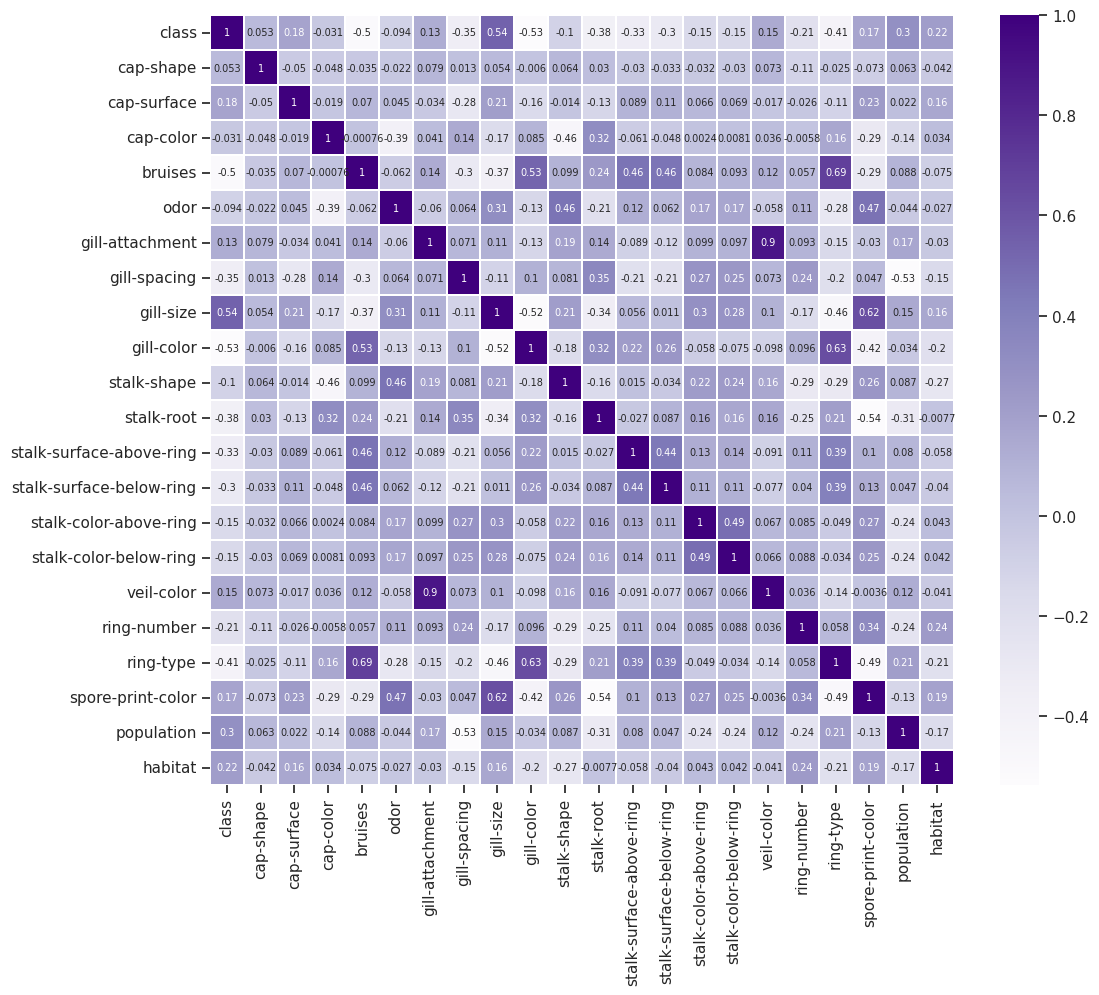

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);


#Data Segregation


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


#Model Training
... prepare the error functions / loss functions


In [ ]:
max_error_scoring = 'max_error'
neg_mean_absolute_error_scoring = 'neg_mean_absolute_error'
r2_scoring = 'r2'
neg_mean_squared_error_scoring = 'neg_mean_squared_error'

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('LRC', LogisticRegression(max_iter=10000)))
models.append(('KNC', KNeighborsClassifier()))




#Candidate Model Evaluation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
results = []
names = []

# split the data into 5 folds

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=max_error_scoring)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=neg_mean_absolute_error_scoring)
    cv_results3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=r2_scoring)
    cv_results4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=neg_mean_squared_error_scoring)
    msg = "%s: max error: %f , mean absolute error: %f, r2: %f, mean squared error: %f" % (name, cv_results.mean(), -cv_results2.mean(), cv_results3.mean(), -cv_results4.mean())
    print(msg)

DTC: max error: 0.000000 , mean absolute error: -0.000000, r2: 1.000000, mean squared error: -0.000000
RFC: max error: 0.000000 , mean absolute error: -0.000000, r2: 1.000000, mean squared error: -0.000000
SVC: max error: -1.000000 , mean absolute error: 0.012003, r2: 0.951927, mean squared error: 0.012003
LRC: max error: -1.000000 , mean absolute error: 0.049239, r2: 0.802727, mean squared error: 0.049239
KNC: max error: -1.000000 , mean absolute error: 0.001846, r2: 0.992601, mean squared error: 0.001846


In [ ]:
# split the data into 10 folds
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=max_error_scoring)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=neg_mean_absolute_error_scoring)
    cv_results3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=r2_scoring)
    cv_results4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring=neg_mean_squared_error_scoring)
    msg = "%s: max error: %f , mean absolute error: %f, r2: %f, mean squared error: %f" % (name, cv_results.mean(), -cv_results2.mean(), cv_results3.mean(), -cv_results4.mean())
    print(msg)

DTC: max error: 0.000000 , mean absolute error: -0.000000, r2: 1.000000, mean squared error: -0.000000
RFC: max error: 0.000000 , mean absolute error: -0.000000, r2: 1.000000, mean squared error: -0.000000
SVC: max error: -1.000000 , mean absolute error: 0.010925, r2: 0.956217, mean squared error: 0.010925
LRC: max error: -1.000000 , mean absolute error: 0.050008, r2: 0.799550, mean squared error: 0.050008
KNC: max error: -0.900000 , mean absolute error: 0.001693, r2: 0.993212, mean squared error: 0.001693


As we see models Decision Tree Classifier and Random Forest Classifier have 0 error

##Decision Tree Classification

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

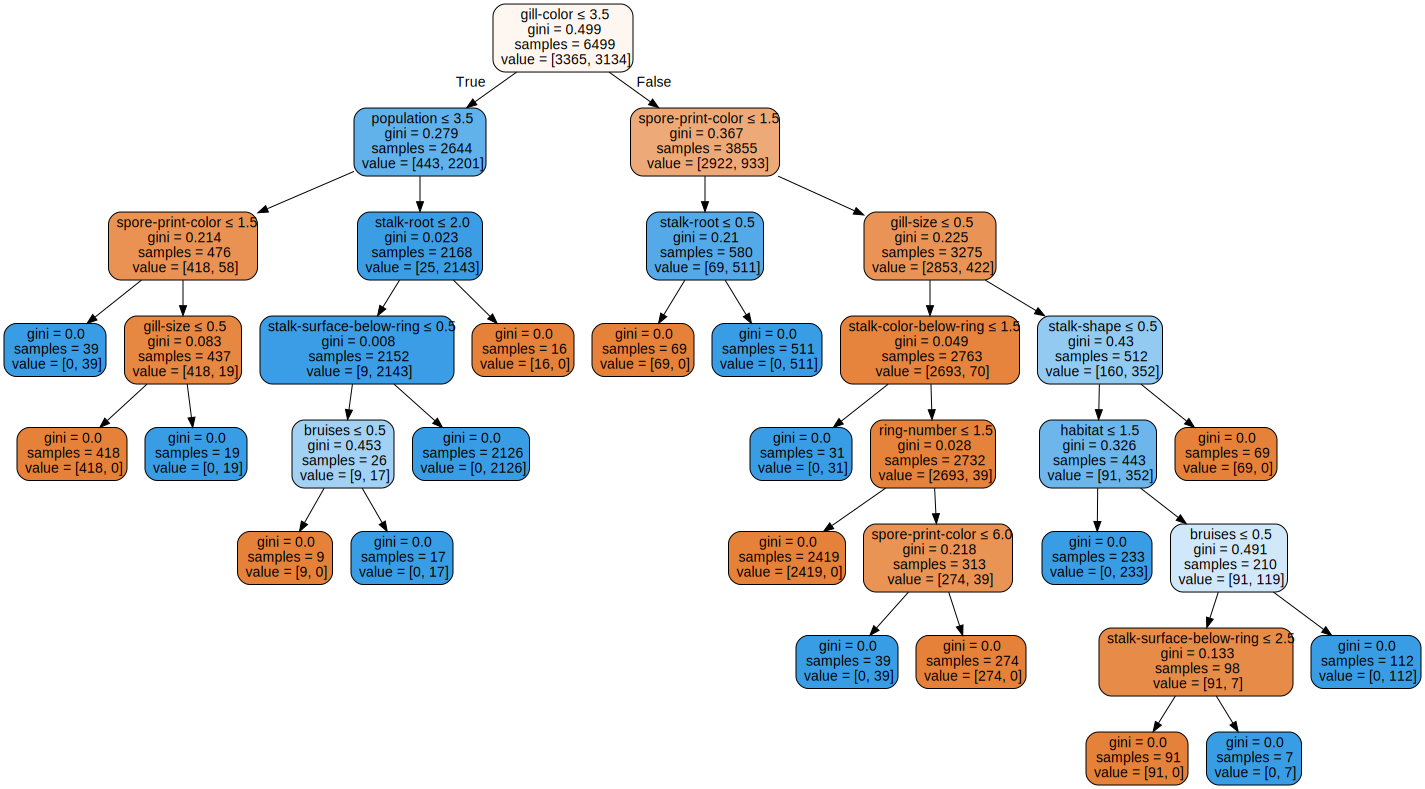

In [ ]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Predicting and estimating the result
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test Accuracy: 100.0%


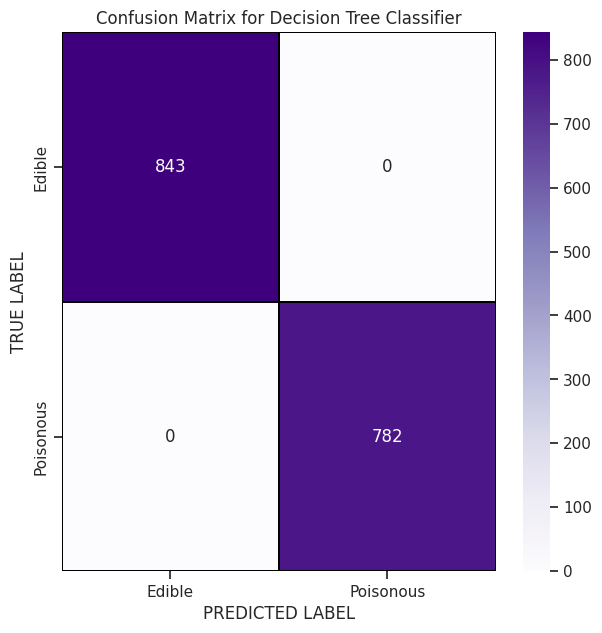

In [ ]:
# Confusion Matrix for Decision Tree Classifier

cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

##Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [ ]:
# Classification report of Random Forest Classifier

y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



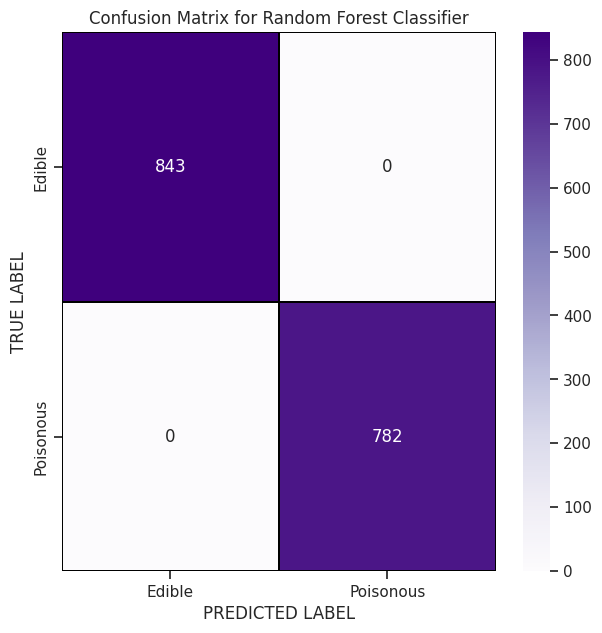

In [ ]:
#Confusion Matrix for Random Forest Classifier

cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
plt.show()

##SVM Classification

In [ ]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [ ]:
# Classification report of SVM Classifier

y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



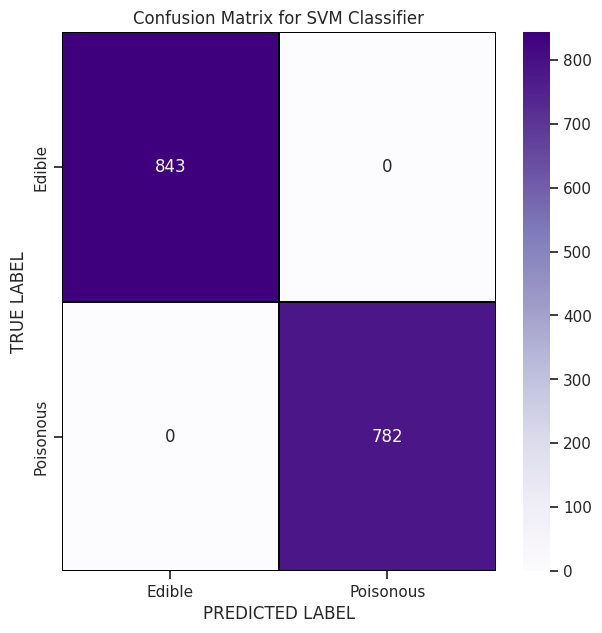

In [ ]:
# Confusion Matrix for SVM Classifier

cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

##KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [ ]:
# Classification report of KNN Classifier

y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      0.99       782

    accuracy                           1.00      1625
   macro avg       0.99      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



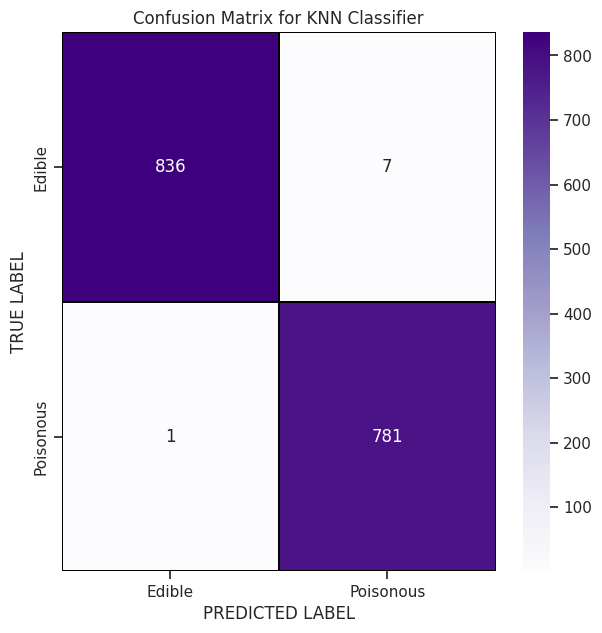

In [ ]:
# Confusion Matrix for KNN Classifier

cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

##Logistic Regression Classification

In [ ]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.77%


In [ ]:
# Classification report of Logistic Regression Classifier

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



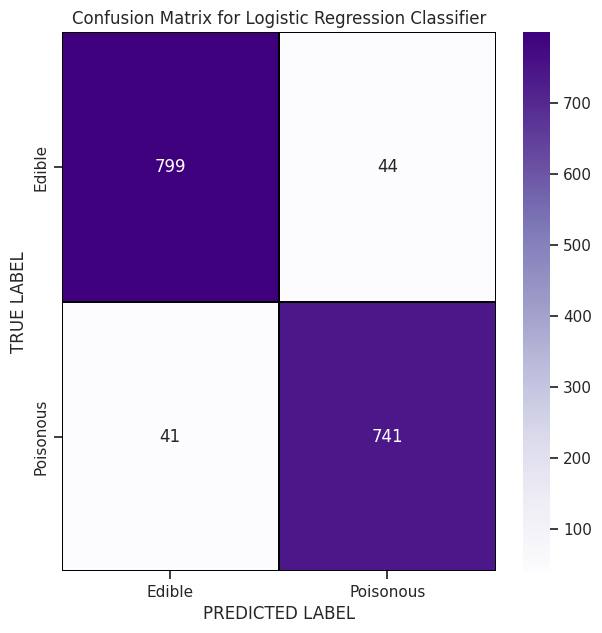

In [ ]:
# Confusion Matrix for Logistic Regression Classifier

cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

###Model tunning

In [ ]:
lr = LogisticRegression(solver="newton-cg", max_iter=500)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))


Test Accuracy: 94.77%


In [ ]:
lr = LogisticRegression(solver="saga", max_iter=5000)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))


Test Accuracy: 94.77%


In [ ]:
lr = LogisticRegression(solver="newton-cg", max_iter=500, penalty='l2')
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.77%


Test Accuracy: 96.62%
Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       843
           1       0.96      0.97      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



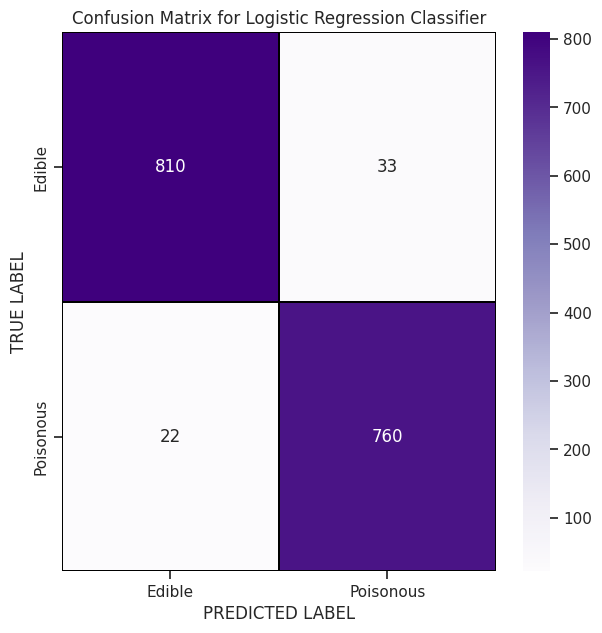

In [ ]:
lr = LogisticRegression(solver="newton-cg", max_iter=500, C=1000)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [ ]:
lr = LogisticRegression(solver="newton-cg", max_iter=500, penalty='l2', C=0.01)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 90.89%


In [ ]:
lr = LogisticRegression(solver="lbfgs", max_iter=5000, C=1000)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 96.62%


Test Accuracy: 96.62%
Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       843
           1       0.96      0.97      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



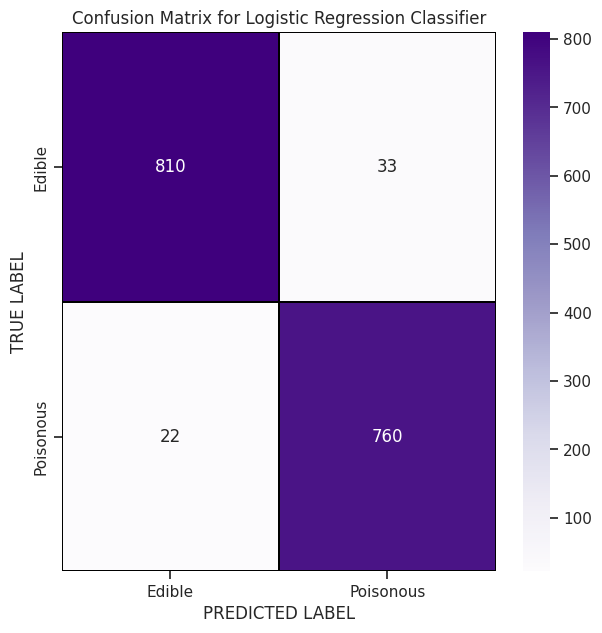

In [ ]:
lr = LogisticRegression(solver="liblinear", max_iter=5000, C=1000)
lr.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

#Summary

All tested ML classification models have high accurate and f1-score. Probably because the data set is sufficiently large and balanced.
The logistic regression model has the lowest accurate. Various hyperparameters were tried to increase it. Increasing the hyperparameter "C" had the greatest influence.